## ======================================================================

# 75.06/95.58 Organización de Datos

# Primer Cuatrimestre de 2018

# Trabajo Práctico 1: Análisis Exploratorio

<br />

## Grupo 17: "Barplotters"
## Integrantes:

<ul>
    <li>Andrés Pablo Silvestri: 85881 (silvestri.andres@gmail.com)</li>
    <li>Axel Brian Erlich: 94847 (axel.erlich@yahoo.com.ar)</li>
    <li>Juan Manuel Gonzalez: 79979 (juanmg0511@gmail.com)</li>
</ul>

<br />

<h5>Link a repositorio de GitHub: https://github.com/silvahlaravel/Organizacion_Datos_2C</h5>
<h5>Fecha de entrega: 24/09/2018</h5>

## ======================================================================


# Introducción

Este trabajo está enfocado en hacer un primer análisis de los datos ofrecidos por trocafone, de manera que encontremos particularidades que puedan ser de interés para dicha entidad.

Siendo este el caso, lo primero que vamos a hacer es interiorizarnos de uno de los pilares que tiene la ciencia de datos, el negocio.


# ¿De qué se encarga Trocafone?

Trocafone es esencialmente una plataforma de comercio online para comprar y vender celulares/tablets usados de forma segura, con la garantía de que trocafone se encarga de validar la procedencia de los aparatos y de garantizar el correcto funcionamiento de los mismos.
En este caso, tracafone nos facilitó un set de datos que contiene distintos tipos de eventos que se registran en el sitio, ya sea visitas, compras u otros tipos de eventos que se detallaran luego

# Organización del Informe:

A continuación la forma en la que esta dividido el informe que llevaremos a cabo.
Lo primero será el armado, formateado y limpieza de los datos, luego haremos análisis general para entender un poco mas el negocio. Finalmente se hara un analisis un poco mas fino sobre los datos para contestar algunas preguntas que podrían llegar a interesar.


## 1 - Importación y estructura de los datos:

    1.1 - Configuración básica y obtención de los datasets.
    1.2 - Procesamiento general de las información y armado básico.
    1.3 - Resumen y cuestiones a tener en cuenta sobre el informe.
    
    
## 2 - Análisis sobre visitas y campañas publicitarias:

    2.1 - Como evoluciono la cantidad de visitas en el año 2018?
    2.2 - Se realizó alguna campaña publicitaria fuerte?
    2.3 - Habra correlacion entre las campañas publicitarias y las visitas?
    
## 3 - Análisis sobre los horarios y la actividad de los usuarios:

    3.1 - ¿Cuáles son los horarios donde se efectivizan mayor cantidad de ventas?
    3.2 - ¿Hay correlación con los horarios donde se efectúan las campañas publicitarias?
    3.3 - ¿Cómo varía la condición de los elementos buscados en los últimos meses?
    
## 4 - Análisis sobre cantidades en general:

    4.1 - ¿Cuáles son los eventos más predominantes?
    4.2 - ¿Cuáles son las familias de Sistemas Operativos que dominan el mercado?
    4.3 - ¿Cuáles son las marcas con más checkous hechos?
    4.4 - ¿Qué podemos observar de los modelos escogidos de las primeras marcas?
    4.5 - ¿Con qué navegador la gente accede al sitio?
    
## 5 - Análisis sobre los dispositivos utilizados y buscados por los usuarios del sitio:

    5.1 - ¿Cuáles son los dispositivos que se usan para ingresar al sitio?
    5.2 - ¿Los usuarios prefieren alguno de estos dispositivos para hacer checkout?
    5.3 - ¿Cómo se relaciona la capacidad de almacenamiento de los dispositivos según su condición de uso?
    
## 6 - Análisis sobre la zona geográfica de los usuarios del sitio:

    6.1 - ¿Cuáles son los principales países desde los que se ingresa al sitio?
    6.2 - ¿Cuál es la relación de visitas entre Brasil y Argentina?
    6.3 - ¿Para Brasil y Argentina, cuáles son las provincias o estados más populares?
    6.4 - ¿Para Brasil y Argentina, cuáles son las ciudades más populares?

# 1 - Importación y estructura de los datos:

## 1.1 - Configuración básica y obtención de los datasets.

In [1]:
# -*- coding: utf-8 -*-
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (25, 20)
pd.set_option('display.max_columns', 50)

In [51]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
eventos = pd.read_csv('events.csv', encoding = 'utf-8')

## ======================================================================

## 1.2 - Procesamiento general de las información y armado básico.

Una vista a alto nivel de los datos y algunos tratamientos para mejorar la permormance de ejecucion sobre el set de datos.
Teniendo como intención armar y preparar los datos para el informe propiamente dicho, por lo cual para cada una de las diferentes fuentes de datos haremos diversos tratamientos, tanto para purificar los datos como para filtrar aquellos que más nos ineresan, se hará una breve explicación sobre lo que se trata de obtener en cada caso a modo de resumen, como así también se comentara cada linea de código para que se pueda interpretar qué es lo que se decidió hacer en cada caso.

## ======================================================================

### 1.2.1 - Categorización y Eventos:

Como primer medida pasamos todas las columnas que en primer instancia nos resultan acordes para ser categorizadas, lo que nos permite darle otro tipo de manejo como así también mejorar el rendimiento de las diferentes operaciones que involucren estas columnas. Hay algunas otras columnas que podrían ser categorizadas pero de momento consideramos que con estas nos basta para el manejo de la información que pretendemos hacer.

Por otro lado también hacemos una difenciación sobre los eventos como para poder tener una visión sobre la importancia que cada uno de estos nos puede proveer, puesto que aunque haya eventos que se relacionan entre sí o pueden significar cosas similares, vamos a considerar que aquellos eventos con mayor cantidad son los que aportan más riqueza al informe.


In [3]:
## PASAMOS LAS COLUMNAS QUE TIENEN UNA CANTIDAD DE VALORES LIMITADA A UN TIPO CATEGORY
eventos['event'] = eventos['event'].astype('category')
eventos['condition'] = eventos['condition'].astype('category')
eventos['storage'] = eventos['storage'].astype('category')
eventos['search_engine'] = eventos['search_engine'].astype('category')
eventos['channel'] = eventos['channel'].astype('category')
eventos['new_vs_returning'] = eventos['new_vs_returning'].astype('category')
eventos['device_type'] = eventos['device_type'].astype('category')
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'], infer_datetime_format=True)
## CONTAMOS LAS APARICIONES DE CADA EVENTO.
eventos_frecuencia = eventos['event'].value_counts()

## ======================================================================

### 1.2.2 - Visitas al sitio y visitas según campañas publicitarias:

A continuación lo que hacemos es diferenciar aquellos eventos que corresponden a las visitas propiamente dichas con aquellas que corresponden al acceso a través de una campaña publicitaria, lo que nos podrá permitir observar el cambio en el tiempo de ambas y compararlas, para estos es necesario agruparlas por mes y diferenciar unas de otras.

In [4]:
## OBTENEMOS AQUELLOS REGISTROS QUE INDICAN UNA VISITA A CUALQUIER URL DEL SITIO.
visitasSitio = eventos.loc[eventos['event'] == 'visited site']
## EVOLUCIÓN EN LA CANTIDAD DE VISITAS CONSIDERANDO QUE SOLO HAY INFORMACIÓN DEL 2018
visitas_por_mes = visitasSitio.groupby(visitasSitio['timestamp'].dt.strftime('%B'))['event'].count()
visitas = pd.DataFrame()
visitas['VisitasSitio'] = visitas_por_mes
visitas = visitas.reset_index()
visitas['timestamp'] = pd.Series(pd.Categorical(visitas['timestamp'], categories=["January","February","March","April","May", "June"]))

visitas['mesNombre'] = ''
visitas.loc[visitas.timestamp.str.contains('January', na=False), 'mesNombre'] = 'ENERO'
visitas.loc[visitas.timestamp.str.contains('February', na=False), 'mesNombre'] = 'FEBRERO'
visitas.loc[visitas.timestamp.str.contains('March', na=False), 'mesNombre'] = 'MARZO'
visitas.loc[visitas.timestamp.str.contains('April', na=False), 'mesNombre'] = 'ABRIL'
visitas.loc[visitas.timestamp.str.contains('May', na=False), 'mesNombre'] = 'MAYO'
visitas.loc[visitas.timestamp.str.contains('June', na=False), 'mesNombre'] = 'JUNIO'
visitas['mesNombre'] = visitas.mesNombre.astype('category')
visitas['timestamp'] = pd.Series(pd.Categorical(visitas['mesNombre'], categories=["ENERO","FEBRERO","MARZO","ABRIL","MAYO", "JUNIO"]))

In [5]:

## OBTENEMOS AQUELLOS REGISTROS QUE NOS INDICAN UNA VISITA POR CAMPAÑA PUBLICITARIA.
visitaPorCampana = eventos.loc[eventos['event'] == 'ad campaign hit']
## EVOLUCIÓN EN LA CANTIDAD DE VISITAS CONSIDERANDO QUE SOLO HAY INFORMACIÓN DEL 2018
visitas_a_productos_por_campana = visitaPorCampana.groupby(visitaPorCampana['timestamp'].dt.strftime('%B'))['event'].count()
visitas_a_productos_por_campana.reset_index()
visitas['Visitas por campaña'] = visitas_a_productos_por_campana.reset_index()['event']


## ======================================================================

### 1.2.3 - Análisis sobre el tiempo:

En este apartado lo que hacemos es en primer instancia ordenar por persona y fecha del evento, lo que nos permite dar un primer paso para luego continuar con una agrupación sobre algunos tipos de eventos particulares (uno con poca cantidad como es conversion y otro con mucha como es campaña) para poder de esta manera hacer un análisis sobre en que momentos del día los usuarios hacen tal o cual acción.

Por otro lado armamos algunas columnas auxiliares que nos permitan separar el tiempo en día, mes y hora para luego poder aplicar esta información como parámetros de búsqueda y organización en los diferentes gráficos que planteamos, como así también por ejemplo plantear el día de la semana con un formato personalizado que nos permita hacer más legible futuros gráficos.

In [6]:
## ORDENAMOS LOS DATOS ṔOR PERSONAS EN PRIMER LUGAR Y TIEMPO EN SEGUNDO.
eventos.sort_values(['person', 'timestamp'], ascending=[True, True], inplace=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
eventos['mes'] = eventos['timestamp'].dt.month
eventos['dia'] = eventos['timestamp'].dt.day
eventos['hora'] = eventos['timestamp'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
eventos['diasemana'] = eventos['timestamp'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
eventos.loc[eventos.diasemana.str.contains('Monday', na=False), 'diasemana'] = 'LUN'
eventos.loc[eventos.diasemana.str.contains('Tuesday', na=False), 'diasemana'] = 'MAR'
eventos.loc[eventos.diasemana.str.contains('Wednesday', na=False), 'diasemana'] = 'MIE'
eventos.loc[eventos.diasemana.str.contains('Thursday', na=False), 'diasemana'] = 'JUE'
eventos.loc[eventos.diasemana.str.contains('Friday', na=False), 'diasemana'] = 'VIE'
eventos.loc[eventos.diasemana.str.contains('Saturday', na=False), 'diasemana'] = 'SAB'
eventos.loc[eventos.diasemana.str.contains('Sunday', na=False), 'diasemana'] = 'DOM'

eventos['mesMayus'] = ''
eventos.loc[eventos.mes == 1, 'mesMayus'] = 'ENERO'
eventos.loc[eventos.mes == 2, 'mesMayus'] = 'FEBRERO'
eventos.loc[eventos.mes == 3, 'mesMayus'] = 'MARZO'
eventos.loc[eventos.mes == 4, 'mesMayus'] = 'ABRIL'
eventos.loc[eventos.mes == 5, 'mesMayus'] = 'MAYO'
eventos.loc[eventos.mes == 6, 'mesMayus'] = 'JUNIO'
## OBTENEMOS LOS EVENTOS DEL TIPO CONVERSION (COMPRAS EFECTIVAS) AGRUPADOS POR HORA Y DÍA.
df_heat = eventos[eventos["event"] == "conversion"].groupby(["hora", "diasemana"])["event"].size().reset_index()
## PONEMOS LOS DÍAS DE LA SEMANA DE MANERA QUE SEA MÁS LEGIBLE PARA EL GRÁFICO.
df_heat['diasemana'] = pd.Categorical(df_heat['diasemana'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
for_heatmap = df_heat.pivot_table(index='hora', columns='diasemana', values='event', aggfunc='sum')
## OBTENEMOS LOS EVENTOS DEL TIPO ACCESO POR CAMPAÑA AGRUPADOS POR HORA Y DÍA.
df_heat_camp = eventos[eventos["event"] == "ad campaign hit"].groupby(["hora", "diasemana"])["event"].size().reset_index()
## PONEMOS LOS DÍAS DE LA SEMANA DE MANERA QUE SEA MÁS LEGIBLE PARA EL GRÁFICO.
df_heat_camp['diasemana'] = pd.Categorical(df_heat_camp['diasemana'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
for_heatmap_camp = df_heat.pivot_table(index='hora', columns='diasemana', values='event', aggfunc='sum')

## ======================================================================

### 1.2.4 - Condición de los equipos:

Independientemente del tipo de evento o incluso de la cantidad de los mismos, buscamos armar un set de datos que nos muestre las preferencias de la gente sobre la condición del aparato, entendiendo que a mayor cantidad mayor es el número de aparatos con esa condición, pero este dato es algo que en primer instancia obtenemos en otro idioma y podemos aplicarle un pequeño trabajo para pasarlo a nuestro idioma y hacerlo más legible en el informe, como así tambien tomar la salvedad de que hay dos tipos de condición que hacen referencia al estado "Bueno", lo que decidimos agruparlo en un solo estado, puesto que no es relevante en cantidad ni tampoco brinda valor como conceptos separados.

In [7]:
## CREAMOS UNA COLUMNA PARA DIFERENCIAR LA CONDICION.
eventos['condicion'] = ''
## ABSTRAEMOS SOLO AQUELLOS QUE TIENEN UNA CONDICIÓN ASOCIADA Y LO PASAMOS A NUESTRO IDIOMA.
eventos_condicion = eventos[eventos['condition'].notnull()]
eventos_condicion.loc[eventos_condicion.condition.str.contains('Excelente', na=False), 'condicion'] = 'Exelente'
eventos_condicion.loc[eventos_condicion.condition.str.contains('Muito Bom', na=False), 'condicion'] = 'Muy Bueno'
eventos_condicion.loc[eventos_condicion.condition.str.contains('Novo', na=False), 'condicion'] = 'Nuevo'
## SOLO NOS QUEDAN DOS TIPOS DE EVENTOS QUE SON REFERENCIA A LOS 'BUENOS'
eventos_condicion.loc[eventos_condicion.condicion == '', 'condicion'] = 'Bueno'

## ======================================================================

### 1.2.5 - Sistemas Operativos de los diferentes equipos:

Vamos a separar los diferentes sistemas operativos de los diferentes equipos que conforman este set de datos, pero no vamos a entrar en el detalle de diferenciar las versiones puntuales de cada sistema operativo (al menos en una primera instancia no nos interesa), sino más bien que vamos a agruparlos de manera de poder conocer las familias de sistemas operativos y poder plantear u observar cuales son aquellas que predominan en el mercado.

De todas maneras esto no quiere decir que no vayamos a diferenciar entre los sistemas que son mobiles o para computadores, aunque la empresa madre sea la misma pretendemos diferenciar los sistemas operativos a gran escala pero por ejemplo tendremos windows y windows phone, lo que requerirá en algunos casos un tratamiento especial.

In [8]:
## CREAMOS UNA COLUMNA CON CONTENIDO VACIO.
eventos['sistema'] = ''
## SEGÚN QUE FAMILIA DE SO POSEA ACTUALIZAMOS NUESTRA NUEVA COLUMNA.
eventos.loc[eventos.operating_system_version.str.contains('Mac', na=False), 'sistema'] = 'MacOS'
eventos.loc[eventos.operating_system_version.str.contains('iOS', na=False), 'sistema'] = 'iOS'
eventos.loc[eventos.operating_system_version.str.contains('Chrome', na=False), 'sistema'] = 'Chrome'
eventos.loc[eventos.operating_system_version.str.contains('Tizen', na=False), 'sistema'] = 'Tizen'
eventos.loc[eventos.operating_system_version.str.contains('Android', na=False), 'sistema'] = 'Android'
eventos.loc[eventos.operating_system_version.str.contains('Windows Phone', na=False), 'sistema'] = 'Windows Phone'
eventos.loc[eventos.operating_system_version.str.contains('Ubuntu', na=False), 'sistema'] = 'Ubuntu'
eventos.loc[eventos.operating_system_version.str.contains('Linux', na=False), 'sistema'] = 'Linux'
## CASO PARTICULAR, WINDOWS Y WINDOWS PHONE COMPARTEN LA PALABRA.
eventos.loc[(eventos.operating_system_version.str.contains('Windows', na=False) & ~eventos.operating_system_version.str.contains('Phone', na=False)), 'sistema'] = 'Windows'
## SOLO NOS QUEDAMOS CON AQUELLAS FILAS QUE TIENEN VALOR.
sistemas = eventos.loc[eventos['sistema'] != '']
## GUARDAMOS LAS APARICIONES AGRUPADAS.
sistemas = sistemas['sistema'].value_counts()

## ======================================================================

### 1.2.6 - Marcas de los diferentes equipos:

Similar a lo que hicimos en el apartado anterior ahora planteamos la idea de buscar dentro de los diferentes equipos las marcas que los conforman, sin meternos nuevamente en el detalle del modelo en particular, sino más bien poder diferenciar y agrupar por marcas, lo que nos permitirá obtener información sobre las marcas más predominantes en el mercado, las preferencias de los usuarios.

De todas maneras también vamos a diferenciar las marcas con mayor importancia en el mercado y ver cuales son los equipos o modelos en particular que estas tienen, siendo esto algo bastante parcial puesto que salen modelos nuevos de manera bastante continua, pero al menos nos sirve como para tener una foto del momento actual en el que se está haciendo el informe.

In [9]:
## AGREGAMOS UNA COLUMNA PARA DIFERENCIAR LAS MARCAS.
eventos['marca'] = ''
## VAMOS OBTENIENDO LAS MARCAS SEGÚN LAS PALABRAS CLAVES QUE LAS CONFORMAN.
eventos.loc[eventos.model.str.contains('Samsung', na=False), 'marca'] = 'Samsung'
eventos.loc[eventos.model.str.contains('Motorola', na=False), 'marca'] = 'Motorola'
eventos.loc[eventos.model.str.contains('Sony', na=False), 'marca'] = 'Sony'
eventos.loc[eventos.model.str.contains('LG ', na=False), 'marca'] = 'LG'
eventos.loc[eventos.model.str.contains('iPad', na=False), 'marca'] = 'iPad'
eventos.loc[eventos.model.str.contains('Asus', na=False), 'marca'] = 'Asus'
eventos.loc[eventos.model.str.contains('iPhone', na=False), 'marca'] = 'iPhone'
eventos.loc[eventos.model.str.contains('Quantum', na=False), 'marca'] = 'Quantum'
eventos.loc[eventos.model.str.contains('Lenovo', na=False), 'marca'] = 'Lenovo'
## YA TENGO DIFERENCIADAS TODAS LAS MARCAS DE LOS PRODUCTOS QUE SE HAN COMPRADO.
vendidos = eventos.loc[eventos['event'] == 'checkout']
vendidos_marcaslow = vendidos.loc[vendidos.marca == '',:]
## GUARDAMOS LAS APARICIONES AGRUPADAS.
vendidos_GRAF = vendidos['marca'].value_counts()
## SEPARAMOS SOLO LOS EVENTOS DEL TIPO CHECKOUTS COMO AQUELLOS MÁS CERCANOS A UNA COMPRA.
checkouts = eventos.loc[eventos['event'] == 'checkout']
## TOMAMOS AQUELLOS QUE CORRESPONDEN A SAMSUNG Y VEMOS SUS MODELOS.
checkouts_S = checkouts.loc[checkouts['marca'] == 'Samsung']
checkouts_SS = checkouts_S['model'].value_counts()
## TOMAMOS AQUELLOS QUE CORRESPONDEN A IPHONE Y VEMOS SUS MODELOS.
checkouts_I = checkouts.loc[checkouts['marca'] == 'iPhone']
checkouts_II = checkouts_I['model'].value_counts()
## TOMAMOS AQUELLOS QUE CORRESPONDEN A MOTOROLA Y VEMOS SUS MODELOS.
checkouts_M = checkouts.loc[checkouts['marca'] == 'Motorola']
checkouts_MM = checkouts_M['model'].value_counts()

## ======================================================================

### 1.2.7 - Distinción entre navegadores web:

Nuestra intención ahora radica en averiguar que navegador usa la mayoría de la gente, sin tratar de diferenciar mucho cuales son navegadores mobile y cuales no, sino simplemente agruparlos y analizar el resultado que esto nos puede traer, a sabiendas que el Chrome es el preferido por la gente al menos en este set de datos, lo que hacemos es diferenciarlos y luego agruparlos en dos Chrome y el resto, y ver que relación y porcentaje nos arroja esto.

In [10]:
## DIFERENCIAMOS LOS NAVEGADORES QUE UTILIZA LA GENTE PARA ACCEDER.
eventos.loc[eventos.browser_version.str.contains('Chrome', na=False), 'navegador'] = 'Chrome'
eventos.loc[eventos.browser_version.str.contains('Opera', na=False), 'navegador'] = 'Opera'
eventos.loc[eventos.browser_version.str.contains('Safari', na=False), 'navegador'] = 'Safari'
eventos.loc[eventos.browser_version.str.contains('Firefox', na=False), 'navegador'] = 'Firefox'
eventos.loc[eventos.browser_version.str.contains('Puffin', na=False), 'navegador'] = 'Puffin'
eventos.loc[eventos.browser_version.str.contains('Facebook', na=False), 'navegador'] = 'Facebook'
eventos.loc[eventos.browser_version.str.contains('Edge', na=False), 'navegador'] = 'Edge'
eventos.loc[eventos.browser_version.str.contains('Samsung', na=False), 'navegador'] = 'Samsung'
eventos.loc[eventos.browser_version.str.contains('IE', na=False), 'navegador'] = 'IE'
eventos.loc[eventos.browser_version.str.contains('Android', na=False), 'navegador'] = 'Android'
eventos.loc[eventos.browser_version.str.contains('UC', na=False), 'navegador'] = 'UC'
## OBTENEMOS AQUELLOS EVENTOS QUE TIENEN UN NABVEGADOR ASIGNADOS.
eventos_chrome = eventos[eventos['navegador'] == 'Chrome']
eventos_sin_chrome = eventos[eventos['navegador'] != 'Chrome']
## SOLO HA BASRTADO DIFERENCIARLOS EN CHROME O EN OTROS PUESTO QUE LOS DEMÁS SON DESPRECIABLES.
sizes = [eventos_chrome.navegador.count(), eventos_sin_chrome.navegador.count()]
nombres = ['Chrome', 'Otros']

## ======================================================================

## 1.3 - Resumen y cuestiones a tener en cuenta sobre el informe.

En base al tratamiento que hemos hecho sobre los datos que nos han otorgado podemos ir armando un informe desde varios puntos de vista, podemos analizar las cantidad sea tanto sobre sistemas operativos que dominan en el mercado, como así también las marcas más predominantes y sus modelos estrellas si se quiere ver de esa manera, para esto hemos hecho diversas agrupaciones, filtrado datos y armado columnas para facilitar su siguiente análisis, esto mismo también se puede aplicar sobre los navegadores web a los cuales hemos de diferenciar y observar el comportamiento del a gente.

También tenemos un tratamiento sobre el tiempo y la evolución sobre el mismo, como así también los horarios más relevantes a la hora de llevar a cabo diferentes tareas, lo que nos podrá dar la pauta de por un lado como va evolucionando la empresa y los equipos o gustos/actividades personaeles, como así también ver aquellos horarios que resultan más propicios para la actividad, lo que brinda una pauta para la empresa de que horarios son los que engloban mayor cantidad de accesos y visitas.

Por último vale agregar que en algunos casos nos hemos tomado la libertad de considerar algunos valores como despreciables en cuanto a relación de cantidad sobre el total, como así también hacer un análisis sobre los eventos que más cantidad de registros nos brindan lo que nos permite entender la situación con un volumen de datos mayor lo cual nos acerca un poco más a la realidad.

## ======================================================================

# 2 - Analisis sobre visitas y campañas publicitarias:

### 2.1 - ¿Como evoluciono la cantidad de visitas en el año 2018?

A sabiendas que el set de datos solo nos proporciona datos sobre el año 2018, lo que plantemoas es ver como ha ido cambiando la cantidad de accesos/visitas al sitio a través de este año, al menos de los meses sobre los cuales tenemos datos, y como podemos ver los primeros meses es un número bajo y luego va incrementándose progresivamente, mientras que al final posee una baja sensible, veremos si estos numeros son respaldados por ingresos debido a una campaña publicitaria.

Text(0,0.5,'Cantidad de visitas')

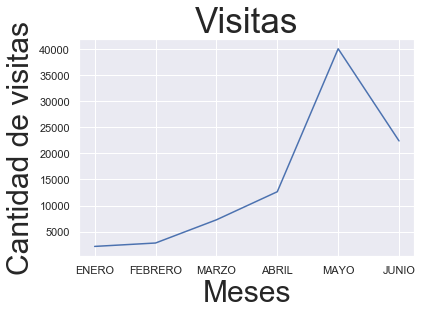

In [11]:
sns.set(style="darkgrid")
g = sns.lineplot(x=visitas['timestamp'], y=visitas['VisitasSitio'])
g.set_title("Visitas", fontsize=35)
g.set_xlabel("Meses", fontsize=30)
g.set_ylabel("Cantidad de visitas", fontsize=30)

### 2.2 - ¿Se realizó alguna campaña publicitaria fuerte en los meses de crecimiento?

Aunque similar podemos ver graficado las visitas al sitio a través de campañas publicitarias, lo que nos indica el valor que estas campañas pueden tener a la hora de aplicarlas o no en la empresa, queda claro que es muy similar al de visitas. Es decir la cantidad de entradas al sitio por campañas sigue la misma forma que las visitas al sitio en general.

Text(0,0.5,'Cantidad de Visitas')

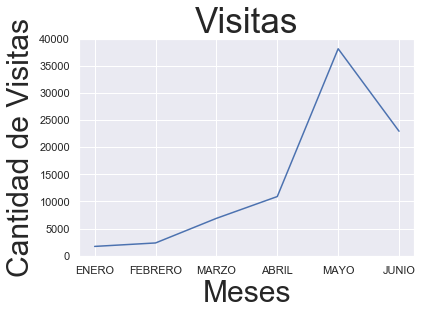

In [12]:
g = sns.lineplot(x="timestamp", y="Visitas por campaña", data=visitas)
g.set_title("Visitas", fontsize=35)
g.set_xlabel("Meses", fontsize=30)
g.set_ylabel("Cantidad de Visitas", fontsize=30)

## 2.3 - ¿Habrá correlacion entre las campañas publicitarias y las visitas?

Se grafican los datos frente a frente, notar como las visitas por campaña son la principal fuente de visitas al sitio, lo que nos indica que estas campañas son bastante provechosas para la empresa y marca una dependencia bastante crítica, puesto que si sobre el último mes las campañas bajaron y las visitas también demuestra una peligrosa dependencia.

Text(0,0.5,'Cantidad de Visitas')

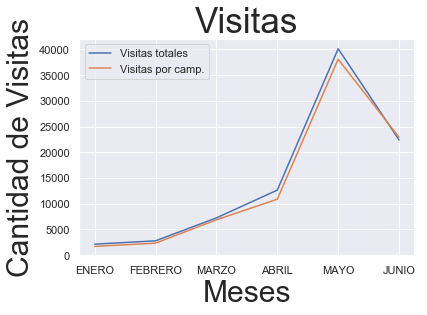

In [13]:
g = sns.lineplot(x="timestamp", y="VisitasSitio", data=visitas, label='Visitas totales')
g = sns.lineplot(x='timestamp', y=visitas['Visitas por campaña'], data=visitas, label='Visitas por camp.')
g.set_title("Visitas", fontsize=35)
g.set_xlabel("Meses", fontsize=30)
g.set_ylabel("Cantidad de Visitas", fontsize=30)

## ======================================================================

# 3 - Analisis sobre los horarios y la actividad de los usuarios:

## 3.1 - ¿Cuáles son los horarios donde se efectivizan mayor cantidad de ventas?

Lo que vemos a continuación es un mapa que nos relacione las horas con los días de la semana y la cantidad de ventas que se han confirmado, siendo este el evento conversion que nos asegura el hecho de que esas ventas se han efectuado, pero su cantidad en relación a otros eventos no es tan representativa, de todas maneras podemos ver esas franjas de horario más escogidas por la gente para las ventas. En conclusión podemos ver que los días de semana en un horario post laboral y hasta la hora de dormir es el período de tiempo donde más se lleva a cabo estos eventos.

Text(30.5,0.5,'Horario')

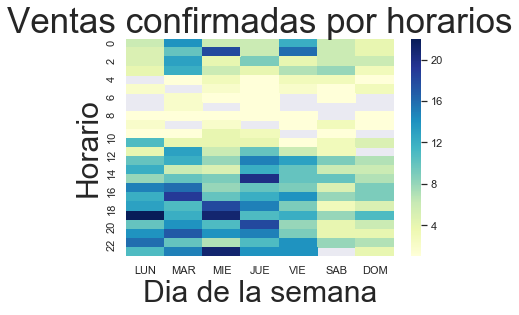

In [14]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Ventas confirmadas por horarios", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

## 3.2 - ¿Hay correlación con los horarios donde se efectúan las campañas publicitarias?

Como sabemos que los eventos de conversión son mucho menos que los otros, buscamos otro por ejemplo los accesos a través de las campañas publicitarias para corroborar si el gráfico anterior refleja verdaderamente la relación de horarios y accesos al sitio. Esto nos muestra que efectivamente el horario post laboral y en los días de semana son los horarios donde mayortráfico y accesos al sitio se da.

Text(30.5,0.5,'Horario')

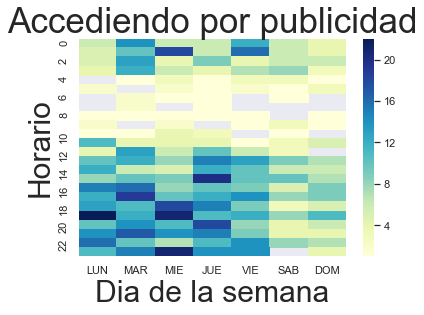

In [15]:
g = sns.heatmap(for_heatmap_camp,  cmap="YlGnBu")
g.set_title("Accediendo por publicidad", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

## 3.3 - ¿Cómo varía la condición de los elementos buscados en los últimos meses?

A continuación buscamos mostrar según el estado de los productos como termina escogiendo la gente y como esta evolución se da en los sucesivos meses donde tenemos información para analizar. Como podemos ver esto se condice un poco con los gráficos que mostraban la evolicón temporal, puesto que los primeros meses el valor numérico es muy inferior y luego se ve un incremento. Con respecto a lo que analizamos vemos que los productos en un estado Bueno son los que dominan pero que han tenido un incremento todavía mayor en los últimos meses, llegando casi a la suma del segundo y tercero en disputa.
Por otro lado vemos que nuevos casi no hay, cosa lógica puesto que la empresa trabaja con equipos usados.

Text(0,0.5,'Cantidad de productos')

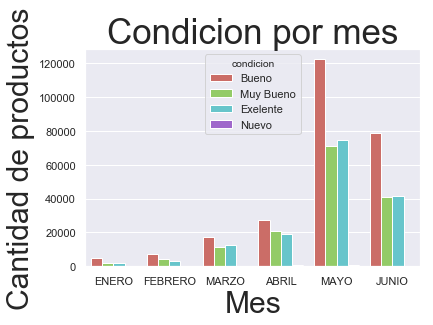

In [16]:
## GRAFICAMOS LA CONDICIÓN DE LOS PRODUCTOS SEGÚN LOS MESES DE OCURRENCIA.
g = sns.countplot(x="mesMayus", hue="condicion", data=eventos_condicion, palette="hls", order=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO'])
g.set_title("Condicion por mes", fontsize=35)
g.set_xlabel("Mes", fontsize=30)
g.set_ylabel("Cantidad de productos", fontsize=30)

## ======================================================================
    
# 4 - Análisis sobre cantidades en general:

## 4.1 - ¿Cuáles son los eventos más predominantes?

Este set de datos esta basado en los eventos que se van registrando en la web, a continuacion se enumeran segun su frecuencia, lo que nos permite sacar una conclución sobre cuales son los eventos que más nos interesa prestarle atención, puesto que a mayor cantidad más podremos análisar su variación.

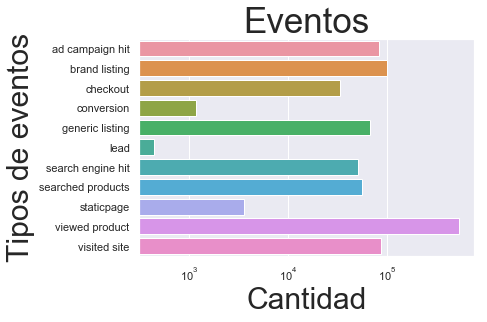

In [17]:
g = sns.barplot(x=eventos_frecuencia.values, y=eventos_frecuencia.index)
g.set_title("Eventos", fontsize=35)
g.set_xlabel("Cantidad", fontsize=30)
g.set_ylabel("Tipos de eventos", fontsize=30)
g.set_xscale('log')

## 4.2 - ¿Cuáles son las familias de Sistemas Operativos que dominan el mercado?

En este apartado vamos a ver los diferentes sistemas operativos y su predominio en el mercado, vale aclarar que no hacemos una distinción entre el tipo de equipo al que pertenece, pero como vemos en el gráfico Android y Windows son los que predominan, siendo el primero para smartphones y el segundo para PC, con lo cual tenemos de manera muy sencilla una idea de que sistema domina en cada tipo de aplicación, siendo despreciable las tablets por su pequeña cantidad en el set  de datos.

Text(0,0.5,'Familia del Sistema Operativo')

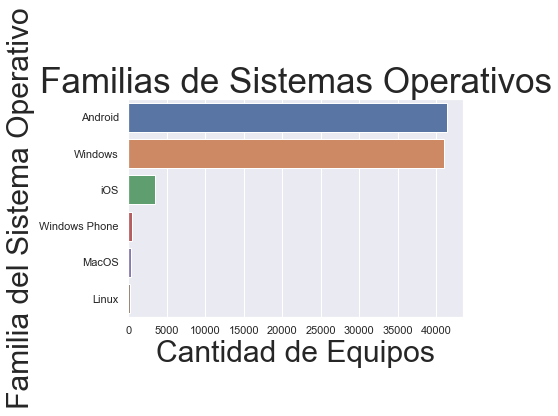

In [18]:
## AHORA MOSTRAMOS UN PRIMER GRÁFICO.
g = sns.barplot(x=sistemas.head(6).values, y=sistemas.head(6).index, orient='h')
g.set_title("Familias de Sistemas Operativos", fontsize=35)
g.set_xlabel("Cantidad de Equipos", fontsize=30)
g.set_ylabel("Familia del Sistema Operativo", fontsize=30)

## 4.2 - ¿Cuáles son las marcas con más checkous hechos?

Tomamos checkouts como aquel evento más cercano a una compra, es cierto que el evento conversion representa feacientemente una compra, pero este contiene muy pocos registros en comparación a checkouts, por lo cual optamos por tomar los checkouts para determinar cuales son las marcas que más dominio tienen sobre el mercado.
Como podemos ver Samsung y Iphone son las marcas que más predominan y teniendo en tercer lugar a Motorola, aunque la diferencia entre los dos primeros y el resto es verdaderamente notable.

Text(0,0.5,'Marca del Equipo')

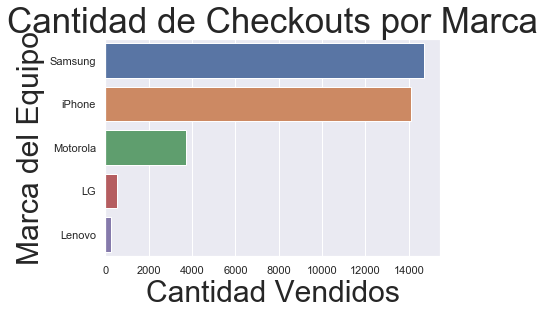

In [19]:
g = sns.barplot(x=vendidos_GRAF.head(5).values, y=vendidos_GRAF.head(5).index, orient='h')
g.set_title("Cantidad de Checkouts por Marca", fontsize=35)
g.set_xlabel("Cantidad Vendidos", fontsize=30)
g.set_ylabel("Marca del Equipo", fontsize=30)

## 4.3 - ¿Qué podemos observar con respecto a los modelos escogidos de las primeras marcas?

Los siguientes tres gráficos aunque muy sencillos nos permiten visualizar cuales son los 5 modelos más buscados para las marcas que dominan el mercado, en samsung podemos ver que el Galaxy J5 supera al resto de manera más marcada, mientras que para las otras dos marcas estan mas parejos los resultados. Es bueno notar de todas maneras que para Motorola la cantidad es menos representativa.

Text(0,0.5,'Modelo')

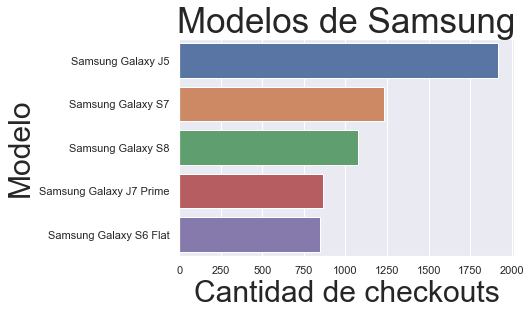

In [20]:
g = sns.barplot(x=checkouts_SS.head(5).values, y=checkouts_SS.head(5).index, orient='h')
g.set_title("Modelos de Samsung", fontsize=35)
g.set_xlabel("Cantidad de checkouts", fontsize=30)
g.set_ylabel("Modelo", fontsize=30)

Text(0,0.5,'Modelo')

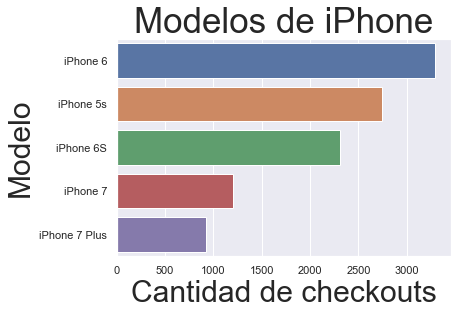

In [21]:
g = sns.barplot(x=checkouts_II.head(5).values, y=checkouts_II.head(5).index, orient='h')
g.set_title("Modelos de iPhone", fontsize=35)
g.set_xlabel("Cantidad de checkouts", fontsize=30)
g.set_ylabel("Modelo", fontsize=30)

Text(0,0.5,'Modelo')

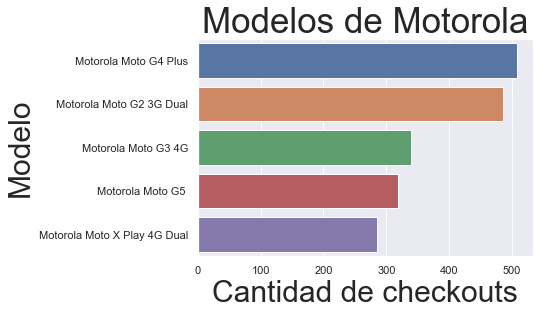

In [22]:
g = sns.barplot(x=checkouts_MM.head(5).values, y=checkouts_MM.head(5).index, orient='h')
g.set_title("Modelos de Motorola", fontsize=35)
g.set_xlabel("Cantidad de checkouts", fontsize=30)
g.set_ylabel("Modelo", fontsize=30)

## 4.4 - ¿Con qué navegador la gente accede al sitio?

Lo que nos proponemos a continuación es analizar cúal es la preferencia de los usuarios con respecto a la elección del navegador a la hora de acceder al sitio, esto aunque no tiene relación directa sobre los aparatos que proporciona la empresa, si nos sirve por un lado para conocer a los usuarios del sitio, viendo que en abrumadora la diferencia que tiene el Chrome sobre el resto, siendo que esto pueda llevar a trabajar en mejoras del sitio puntuales con respecto a este navegador.

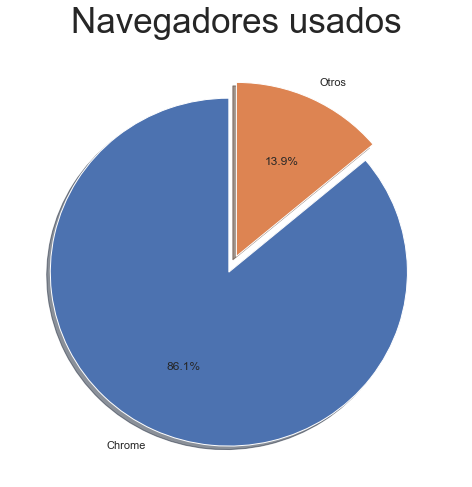

In [23]:
## GRAFICAMOS LA PROPORCIÓN ENTRE EL ONLINE Y EL OFFLINE.
plt.figure(figsize=(8, 8))
plt.title('Navegadores usados', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

## ======================================================================

# 5 - Análisis sobre los dispositivos utilizados por los usuarios del sitio:

### 5.1 ¿Cuáles son los dispositivos que se usan para ingresar al sitio?

Text(0,0.5,'Tipos de dispositivos')

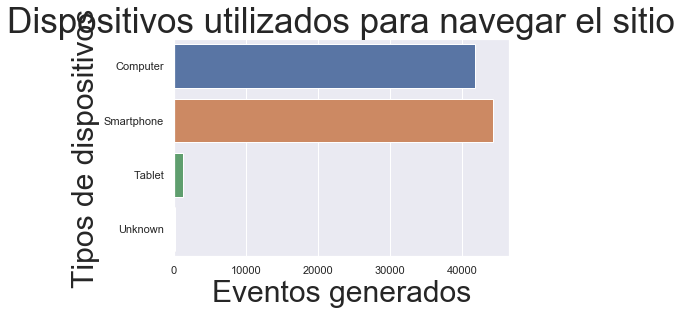

In [24]:
device_types = eventos['device_type'].value_counts()
g = sns.barplot(x=device_types.values, y=device_types.index, orient='h')
g.set_title("Dispositivos utilizados para navegar el sitio", fontsize=35)
g.set_xlabel("Eventos generados", fontsize=30)
g.set_ylabel("Tipos de dispositivos", fontsize=30)

Por lo que se observa en el grafico, hay un cantidad muy parecida de eventos generados desde smartphones y computers, quedando relegadas las tablets por un amplio rango, esto puede indicarnos que tal vez no es tan necesario dedicar desarrollo de visualizaciones para dispositivos de tamaño mediano como una tablet y poner mas enfasis en el desarrollo para mejorar la interfaz en la web y en dispositivos pequeños como los smartphones.

Un punto a destacar hay una gran cantidad de eventos que se generaron de una fuente desconocida:

In [25]:
cantidadTotalEventos = eventos['device_type'].shape[0]
cantidadEventosDispositivosDesconocidos = eventos['device_type'].isnull().sum()

print('CANTIDAD TOTAL DE EVENTOS GENERADOS:' + str(cantidadTotalEventos))
print('CANTIDAD TOTAL DE EVENTOS GENERADOS DESDE DISPOSITIVOS DESCONOCIDOS: ' + str(cantidadEventosDispositivosDesconocidos))

In [26]:
print('Entonces desconocemos el dispositivo que originó evento para el: ' + str((round(cantidadEventosDispositivosDesconocidos/cantidadTotalEventos,4)) * 100) + '% de los eventos')

### 5.2 - ¿Los usuarios prefieren alguno de estos dispositivos para hacer checkout?

Esto nos deja con un subconjunto demasiado chico de los datos para poder analizar mas en profundidad los comportamientos de los usuarios segun el dispositivo utilizado. Por ejemplo, si queremos analizar la cantidad de checkouts desde cada dispositivo:

In [27]:
eventos_checkout = eventos[eventos['event'] == "checkout"]
eventos_checkout['device_type'].value_counts()

Unknown       0
Tablet        0
Smartphone    0
Computer      0
Name: device_type, dtype: int64

Vemos que no hay ningun evento de checkout sobre el cual sepamos desde qué dispositivo se realizó. Lo que nos deja sin posibilidad de analizar la pregunta siguiente: ¿Los usuarios prefieren alguno de estos dispositivos para hacer checkout?

### 5.3 - ¿Cómo se relaciona la capacidad de almacenamiento de los dispositivos según su condición de uso?

En estecaso nos interesa ver una relación entre un puntaje dado sobre la condición de uso (de menor a mayor en modo numérico) y su capacidad de almacenamiento, lo que nos podría brindar información sobre por ejemplo si los equiṕos de mayor capacidad son buscados en mejores condiciones (muy bueno o exelente), como también saber si a menor capacdad da almacenamiento nos interesa poco su condición. Estas son hipótesis en un análisis previo. el gráfico en cambio nos muestra una realidad donde son muy pocos los equipos de alta capacidad y la mayoría son buscados en una condición básica o normal, lo que denominamos Buenos.

In [62]:
eventos['Capacidad en GB'] = 0
eventos.loc[eventos.storage.str.contains('16GB', na=False), 'Capacidad en GB'] = 16
eventos.loc[eventos.storage.str.contains('32GB', na=False), 'Capacidad en GB'] = 32
eventos.loc[eventos.storage.str.contains('64GB', na=False), 'Capacidad en GB'] = 64
eventos.loc[eventos.storage.str.contains('128GB', na=False), 'Capacidad en GB'] = 128
eventos.loc[eventos.storage.str.contains('8GB', na=False), 'Capacidad en GB'] = 8
eventos.loc[eventos.storage.str.contains('256GB', na=False), 'Capacidad en GB'] = 256
eventos.loc[eventos.storage.str.contains('4GB', na=False), 'Capacidad en GB'] = 4
eventos.loc[eventos.storage.str.contains('512MB', na=False), 'Capacidad en GB'] = 0.512
eventos_capacidad = eventos[eventos['Capacidad en GB'] != 0]

## CREAMOS UNA COLUMNA PARA DIFERENCIAR LA CONDICION.
eventos_capacidad['Puntaje'] = 0
## ABSTRAEMOS SOLO AQUELLOS QUE TIENEN UNA CONDICIÓN ASOCIADA Y LO PASAMOS A NUESTRO IDIOMA.
eventos_capacidad = eventos_capacidad[eventos_capacidad['condition'].notnull()]
eventos_capacidad.loc[eventos_capacidad.condition.str.contains('Excelente', na=False), 'Puntaje'] = 4
eventos_capacidad.loc[eventos_capacidad.condition.str.contains('Muito Bom', na=False), 'Puntaje'] = 3
eventos_capacidad.loc[eventos_capacidad.condition.str.contains('Novo', na=False), 'Puntaje'] = 5
## SOLO NOS QUEDAN DOS TIPOS DE EVENTOS QUE SON REFERENCIA A LOS 'BUENOS'
eventos_capacidad.loc[eventos_capacidad.Puntaje == 0, 'Puntaje'] = 2

In [ ]:
sns.jointplot(x="Capacidad en GB", y="Puntaje", data=eventos_capacidad, kind="kde");

## ======================================================================

# 6 - Análisis sobre la zona geográfica de los usuarios del sitio:

### 6.1 - ¿Cuáles son los principales países desde los que se ingresa al sitio?

Estudiaremos a continuación los principales países desde donde se produce la mayor cantidad de accesos del sitio. El único evento con información de regiones es 'visited site', por lo que nos centraremos en esos registros.

En primer lugar, nos quedamos con los 5 países mas populares y el resto los agrupamos en 'Otros'. También ignoramos los registros con valor Unknown:

In [28]:
eventos['pais_grafico_visitas'] = eventos['country']
eventos.loc[eventos['pais_grafico_visitas'].str.contains(r'United.States', na=False), 'pais_grafico_visitas'] = 'USA'
eventos.loc[eventos['pais_grafico_visitas'].str.contains(r'\b(?!Brazil|USA|Argentina|Canada|Unknown)\b\S+', na=False), 'pais_grafico_visitas'] = 'Otros'
eventos.loc[eventos['pais_grafico_visitas'].str.contains(r'USA', na=False), 'pais_grafico_visitas'] = 'Estados Unidos'

isNotUnknown = eventos['pais_grafico_visitas'] != 'Unknown'

Text(0,0.5,u'Pa\xeds')

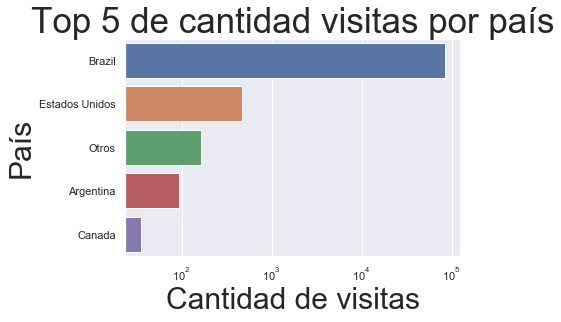

In [29]:
pais_grafico_data = eventos[isNotUnknown]['pais_grafico_visitas'].value_counts()
g = sns.barplot(x=pais_grafico_data.values, y=pais_grafico_data.index, orient='h')
g.set_xscale('log')
g.set_title(u"Top 5 de cantidad visitas por país", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"País", fontsize=30)

Vemos que principalmente se está accediendo al sitio desde Brasil, seguido de Estados Unidos un orden de magnitud por debajo. Argentina, el otro país donde opera Trocafone, aparece en cuarto lugar, dos ordenes de magnitud por debajo de Brasil.

### 6.2 - ¿Cuál es la relación de visitas entre Brasil y Argentina?

Dado que la empresa opera en estos dos países, rehacemos el gráfico anterior pero solo con esos datos:

Text(0,0.5,u'Pa\xeds')

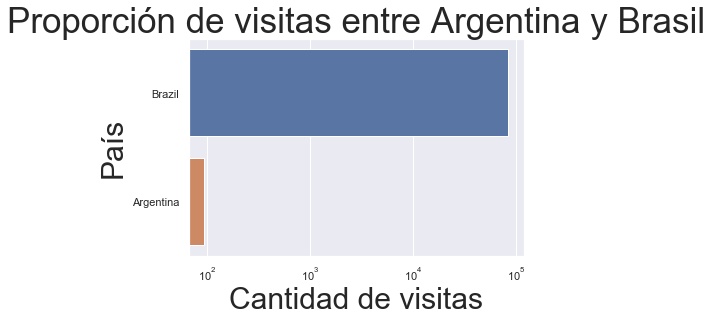

In [30]:
isBrazil = eventos['country'] == 'Brazil'
isArgentina = eventos['country'] == 'Argentina'

visitas_argentina_vs_brasil_grafico_data = eventos[isBrazil | isArgentina]['country'].value_counts()

g = sns.barplot(x=visitas_argentina_vs_brasil_grafico_data.values, y=visitas_argentina_vs_brasil_grafico_data.index, orient='h')
g.set_xscale('log')
g.set_title(u"Proporción de visitas entre Argentina y Brasil", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"País", fontsize=30)

Si mostramos los valores de cada uno, obtenemos que Brasil representa el 99,9% del total de tráfico y Argentina tan solo el 0,1%.

In [31]:
eventos[isBrazil | isArgentina]['country'].value_counts()

Brazil       84308
Argentina       94
Name: country, dtype: int64

Se debe tener en cuenta, a la hora de analizar estos resultados, el tamaño en cuanto a cantidad de población de ambos países: sólo el estado de San Pablo cuenta con una población de 41 millones de habitantes (dato censo IBGE 2010), que es aproximadamente 1 millón más que el total de habitantes de Argentina según el censo del INDEC del año 2010.

En total, la IBGE estima que en el 2014 Brasil contaba con unos 200 millones de habitantes, mientras que en Argentina el INDEC estimó para el mismo año unos 42 millones.

### 6.3 - ¿Para Brasil y Argentina, cuáles son las provincias o estados más populares?

Con el objetivo de entender como se reparte geográficamente la información presentada en el punto anterior, para cada uno de estos países estudiaremos los estados (en el caso de Brasil) y las provincias (en el caso de Argentina) desde donde se originan las visitas al sitio:

Text(0,0.5,u'Estado')

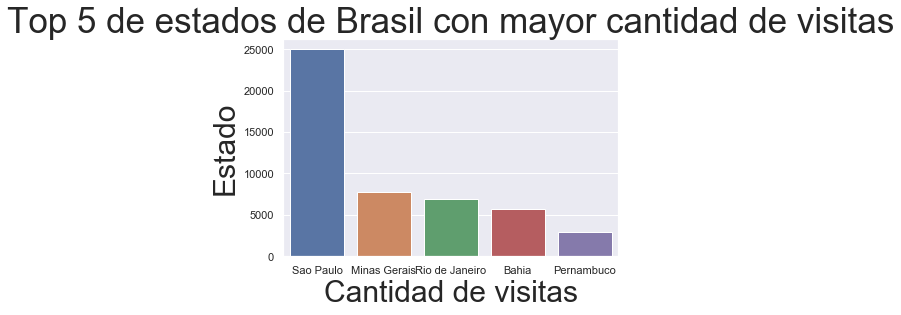

In [32]:
eventos['region_grafico_visitas'] = eventos['region']
isNotUnknownRegion = eventos['region_grafico_visitas'] != 'Unknown'
region_brasil_grafico_data = eventos[isBrazil & isNotUnknownRegion]['region_grafico_visitas'].value_counts()[:5]
g = sns.barplot(y=region_brasil_grafico_data.values, x=region_brasil_grafico_data.index)
g.set_title(u"Top 5 de estados de Brasil con mayor cantidad de visitas", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"Estado", fontsize=30)

En el caso de Brasil, vemos que el estado de San Pablo es el que reúne la mayor cantidad de visitas, con una cantidad aproximada de 25.000 eventos. Por debajo aparecen Bahia y Rio de Janeiro, ya con menos de 10.000.

Si analizamos estos resultados, y los comparamos por ejemplo con la cantidad de habitantes de estas regiones, encontraremos que la lista prácticamente coincide con dicho ránking (datos censo IBGE 2010):

* San Pablo (22% de la población total)
* Minas Gerais (10% de la población total)
* Rio de Janeiro (8% de la población total)
* Bahia (7% de la población total)
* Pernambuco (5% de la población total)

Asimismo, podemos ver que entre Minas Gerais, Rio de Janeiro y Bahia está concentrado el 25% de la población, apenas por encima de la cantidad del estado de San Pablo. Los tres primeros de la lista, además, son los que tienen mayor producto bruto (y el 52% de todo el país). Estos datos fueron tomados del Reporte de cuentas regional, publicado por el IBGE en el año 2015:

* San Pablo (32% del total)
* Rio de Janeiro (11% del total)
* Minas Gerais (9% del total)


Text(0,0.5,u'Provincia')

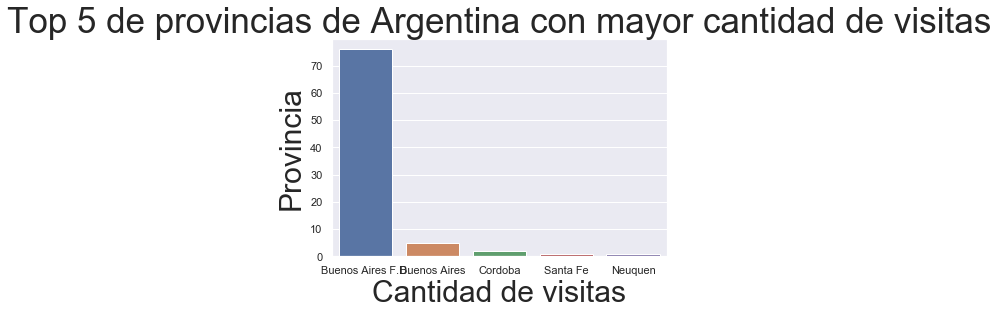

In [33]:
region_argentina_grafico_data = eventos[isArgentina & isNotUnknownRegion]['region_grafico_visitas'].value_counts()[:5]
g = sns.barplot(y=region_argentina_grafico_data.values, x=region_argentina_grafico_data.index)
g.set_title(u"Top 5 de provincias de Argentina con mayor cantidad de visitas", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"Provincia", fontsize=30)

Para el caso de Argentina, se puede apreciar que la gran mayoría de las visitas (aproximadamente el 80%) proviene de la Ciudad Autónoma de Buenos Aires, seguida por la provincia de Buenos Aires y Córdoba, las tres áreas con mayor población y concentración de riqueza del país.

Si bien la provincia de Buenos Aires es la que conentra la mayor cantidad de habitantes, debemos considerar que la zona de mayor población dentro de la provincia es el Gran Buenos Aires, que junto con la Ciudad Autónoma de Buenos Aires concentran aproximadamente el 46% de la población del país (datos del censo del INDEC de 2010).

### 6.4 - ¿Para Brasil y Argentina, cuáles son las ciudades más populares?

Finalmente, repetimos el estudio anterior pero utilizando los datos de ciudades de ambos países:

Text(0,0.5,u'Ciudad')

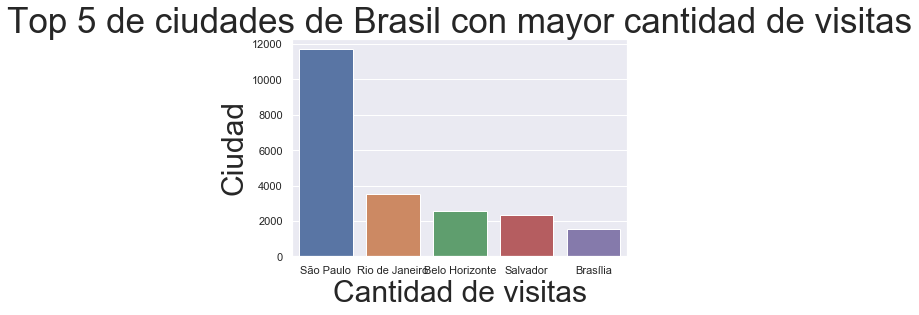

In [34]:
eventos['ciudad_grafico_visitas'] = eventos['city']
isNotUnknownCity = eventos['ciudad_grafico_visitas'] != 'Unknown'
ciudad_brasil_grafico_data = eventos[isBrazil & isNotUnknownCity]['ciudad_grafico_visitas'].value_counts()[:5]
g = sns.barplot(y=ciudad_brasil_grafico_data.values, x=ciudad_brasil_grafico_data.index)
g.set_title(u"Top 5 de ciudades de Brasil con mayor cantidad de visitas", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"Ciudad", fontsize=30)

Text(0,0.5,u'Ciudad')

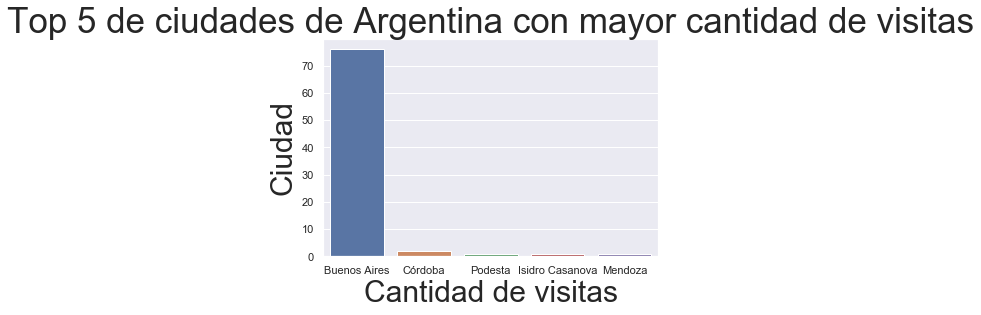

In [35]:
eventos['ciudad_grafico_visitas'] = eventos['city']
isNotUnknownCity = eventos['ciudad_grafico_visitas'] != 'Unknown'
ciudad_argentina_grafico_data = eventos[isArgentina & isNotUnknownCity]['ciudad_grafico_visitas'].value_counts()[:5]
g = sns.barplot(y=ciudad_argentina_grafico_data.values, x=ciudad_argentina_grafico_data.index)
g.set_title(u"Top 5 de ciudades de Argentina con mayor cantidad de visitas", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"Ciudad", fontsize=30)

Podemos ver que los resultados son análogos al obtenido en el análisis de regiones.